In [68]:
import pandas as pd
import json
from collections import defaultdict
import re
import numpy as np
import statistics
from scipy import stats

In [134]:
def extraerDatosTarjetas(rawData):
    erGameObject3 = re.compile(r'\bgame-object$\b')
    erGameObject = re.compile(r'\btutorials_panel_open$\b')
    erGameObject2 = re.compile(r'\bretry_button$\b')
    erInteracted = re.compile(r'\binteracted$\b')
    erCompleted = re.compile(r'\bcompleted$\b')
    erInitialized = re.compile(r'\binitialized$\b')
    erLevel = re.compile(r'\blevel$\b')
    erAccessed = re.compile(r'\baccessed$\b')
    erIdLevel = re.compile(r'/')
    
    data = defaultdict(defaultdict)
    nivel = defaultdict()

    #Para cada traza...
    for evento in rawData:
        
        #Guardamos el verbo y el objeto de la traza
        verb = evento["verb"]["id"]
        obj = evento["object"]["definition"]["type"]
        obj2 = evento["object"]["id"]
        levelCode = 0

        #Empezamos nivel y lo guardamos para luego mirar si es el editor level
        if erLevel.search(obj) and erInitialized.search(verb):
            if "result" in evento:
                name = evento["actor"]["name"]
                levelCode = erIdLevel.split(evento["object"]["id"])[-1]
                nivel[name] = levelCode

        #Si el objeto de la acción es la guia
        elif erGameObject.search(obj2) :
            name = evento["actor"]["name"]
            #print("aaaa")

            #Si el verbo es accessed...
            if erAccessed.search(verb):

                #Con try-catch evitamos errores de si una traza tiene el verbo y objeto que buscamos pero no es la traza propia que queremos analizar, ya que hay muchas con el mismo verbo y objeto
                try:
                    #Descartamos el editor level
                    if nivel[name] != "editor_level" and nivel[name] != None:
                     
                        levelCode = nivel[name]

                        if levelCode not in data[name]:
                            data[name][levelCode] = 1
                        else:
                            data[name][levelCode] += 1
                except KeyError:
                    pass     

        #Si pulsa reset...
        elif erGameObject2.search(obj2):
            name = evento["actor"]["name"]  

            #Si el verbo es accessed...
            if erInteracted.search(verb):

                #Con try-catch evitamos errores de si una traza tiene el verbo y objeto que buscamos pero no es la traza propia que queremos analizar, ya que hay muchas con el mismo verbo y objeto
                try:
                    #Descartamos el editor level
                    if nivel[name] != "editor_level" and nivel[name] != None:
                     
                        levelCode = nivel[name]

                        if levelCode not in data[name]:
                            data[name][levelCode] = 1
                        else:
                            data[name][levelCode] += 1
                except KeyError:
                    pass 

    return data

In [135]:
def media(data):

    media = defaultdict(int)

    for name in data:
        for levelCode in data[name]:
            media[levelCode] += data[name][levelCode]
    

    for nivel in media:
        media[nivel] = media[nivel] / len(data)

    
    df_media = pd.DataFrame.from_dict(media,orient='index',columns=['media'])
    return df_media


In [136]:
#Aqui mostramos los datos y abrimos los json
JSONFile = open('traces_Articoding_Escolapias.json')
rawData = json.load(JSONFile)
dataCreadas = extraerDatosTarjetas(rawData)

pd.DataFrame(dataCreadas)

JSONFile.close()

pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', None)
#pd.DataFrame(data)

pd.DataFrame(dataCreadas)

,gqoj,uala,hjpbw,ftpnb,loemd,gcpze,ikcar,fkmtp,sxipu,vsxld,ipdcp,qeqyj,khadt,gleqe,bdwyj,ejeuw,srjon,zwzfv,uzzpo,epqkm,zxvkj,eprdu,pbgky,kmqou,xnpqf,rdiaf,grkij,ubmtx,auvqa,yvpmf,onyep,bhyhw,edxmq,asopk,pygoc,oahey,yfohf,tekwp,accul,zcibf,nmveq,tjfzy,swvxx,dwqwi,dunul,sjpkc,krahz,cmbfi,kkoif,psido,zbgwk,gdljy,mymho,tinco,wjaxi,dvmlu,gguuc,fivin,kkliq,tgwmn,yxewz,ewqbs,ucdvy,lwryl,hpdxj,fyyya,rziia,dmwvy,ztyed,yxjji,mjiso,camhi,hqmhq,vddlg,stiry,ngavz,bjvnt,tqgyp,huyyb,wqmgq,yazod,vvqlm,atlzs,aotlm,tavin,tvxow,ahxym,rqlug,idmzi,xtdrq,jozyx,knewj,mgaak,zdnso,qfsdj,jhbuv,lhrbj,buvgs,icllt,thaho,rqaby,mewpz,qwnpf,khfha,ptmkr,esrit,yyvas,pbwkf,gzgfk,sbexy,nhbnj,hcbyl,uniee,rkmrw,nuasx,fmtrq,pzfdd,itkas,nplrf,kzles,lohyo,rfofs,cojqb,qbsjv,blvkx,ixrux,orjyn,eayrh,fbldj,qgcgc,tcvyz,rsjxu,pleui,xbmmw,fmupf,tflzv,sybwc,vkfnt,bajbm,raqdt,prpej,pqwaf,olugf,epjcx
tutorials_2,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,2.0,1.0,2.0,5.0,4.0,NaN,1.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,7.0,NaN,1.0,NaN,NaN,NaN,1.0,2.0,1.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,1.0,NaN,2.0,3.0,1.0,NaN,5.0,4.0,NaN,1.0,1.0,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,6.0,NaN,3.0,NaN,NaN,NaN,3.0,NaN,NaN,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
tutorials_1,2.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
tutorials_4,3.0,NaN,2.0,1.0,NaN,NaN,2.0,1.0,1.0,NaN,3.0,2.0,1.0,2.0,NaN,1.0,1.0,4.0,1.0,3.0,1.0,NaN,NaN,NaN,NaN,2.0,6.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,NaN,1.0,5.0,2.0,2.0,2.0,4.0,7.0,3.0,1.0,NaN,16.0,NaN,NaN,NaN,1.0,6.0,6.0,3.0,2.0,NaN,1.0,3.0,3.0,2.0,2.0,2.0,4.0,1.0,2.0,NaN,2.0,6.0,29.0,2.0,5.0,2.0,NaN,2.0,1.0,NaN,NaN,3.0,1.0,3.0,5.0,4.0,2.0,2.0,1.0,1.0,2.0,10.0,2.0,1.0,3.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,4.0,1.0,NaN,NaN,1.0,3.0,5.0,2.0,10.0,2.0,12.0,4.0,3.0,1.0,2.0,NaN,NaN,NaN,1.0,NaN,6.0,35.0,8.0,3.0,3.0,13.0,4.0,1.0,NaN,1.0,3.0,9.0,NaN,1.0,NaN,7.0,5.0,6.0,3.0,2.0,2.0,NaN,9.0,8.0
variables_2,1.0,NaN,3.0,2.0,2.0,1.0,2.0,10.0,9.0,1.0,1.0,3.0,5.0,NaN,2.0,4.0,1.0,6.0,NaN,2.0,3.0,1.0,13.0,6.0,NaN,10.0,2.0,12.0,5.0,7.0,14.0,1.0,11.0,2.0,NaN,2.0,5.0,20.0,16.0,1.0,51.0,9.0,6.0,4.0,1.0,24.0,1.0,NaN,NaN,2.0,5.0,11.0,4.0,4.0,5.0,8.0,5.0,2.0,7.0,17.0,19.0,11.0,2.0,2.0,7.0,1.0,54.0,8.0,45.0,40.0,1.0,1.0,1.0,NaN,1.0,4.0,1.0,6.0,NaN,22.0,1.0,7.0,3.0,3.0,10.0,4.0,7.0,16.0,3.0,4.0,4.0,7.0,1.0,3.0,1.0,3.0,2.0,NaN,NaN,6.0,15.0,5.0,NaN,13.0,3.0,10.0,NaN,4.0,16.0,3.0,11.0,1.0,NaN,3.0,24.0,3.0,9.0,23.0,1.0,1.0,3.0,4.0,6.0,10.0,1.0,1.0,2.0,2.0,1.0,2.0,3.0,9.0,1.0,2.0,3.0,30.0,NaN,4.0,4.0,NaN,NaN,1.0,6.0,11.0
tutorials_5,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,5.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
tutorials_7,NaN,NaN,5.0,1.0,NaN,NaN,1.0,1.0,3.0,NaN,1.0,NaN,NaN,1.0,2.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,2.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,3.0

In [137]:
mediaNiveles = media(dataCreadas)
mediaNiveles

,media
tutorials_2,0.888889
tutorials_1,0.263889
tutorials_4,2.833333
variables_2,6.347222
tutorials_5,0.312500
tutorials_7,1.284722
variables_3,3.131944
variables_4,3.312500
variables_5,5.729167
variables_6,2.319444


In [142]:
def rankingNiveles(data):
    df_media = media(data)
    df_media = df_media.sort_values(by='media',ascending=False)
    return df_media





In [143]:
ranking = rankingNiveles(dataCreadas)
pd.DataFrame(ranking)

,media
variables_2,6.347222
variables_5,5.729167
variables_4,3.312500
variables_3,3.131944
tutorials_4,2.833333
types_3,2.347222
variables_6,2.319444
types_4,1.708333
types_5,1.638889
variables_7,1.527778


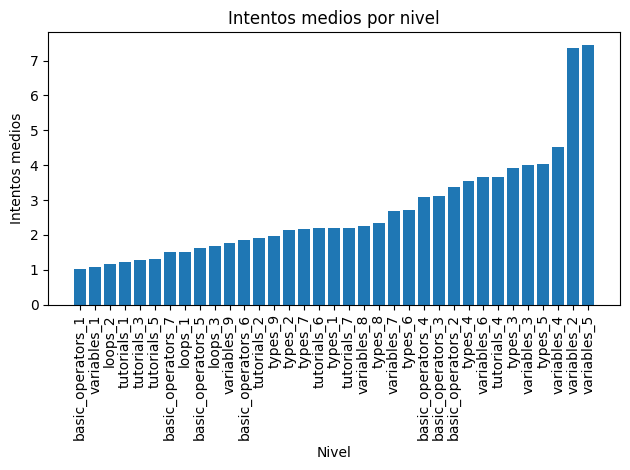

In [1]:
import matplotlib.pyplot as plt

data = [('basic_operators_1', 1.03), ('variables_1', 1.07), ('loops_2', 1.17), ('tutorials_1', 1.23), ('tutorials_3', 1.28), ('tutorials_5', 1.31), ('basic_operators_7', 1.5), ('loops_1', 1.5), ('basic_operators_5', 1.62), ('loops_3', 1.67), ('variables_9', 1.77), ('basic_operators_6', 1.86), ('tutorials_2', 1.9), ('types_9', 1.97), ('types_2', 2.13), ('types_7', 2.18), ('tutorials_6', 2.19), ('types_1', 2.19), ('tutorials_7', 2.2), ('variables_8', 2.25), ('types_8', 2.35), ('variables_7', 2.68), ('types_6', 2.71), ('basic_operators_4', 3.08), ('basic_operators_3', 3.12), ('basic_operators_2', 3.38), ('types_4', 3.55), ('variables_6', 3.66), ('tutorials_4', 3.67), ('types_3', 3.92), ('variables_3', 4.01), ('types_5', 4.03), ('variables_4', 4.52), ('variables_2', 7.36), ('variables_5', 7.44)]

niveles = [x[0] for x in data]
intentos = [x[1] for x in data]

plt.bar(niveles, intentos)
plt.xlabel("Nivel")
plt.ylabel("Intentos medios")
plt.title("Intentos medios por nivel")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

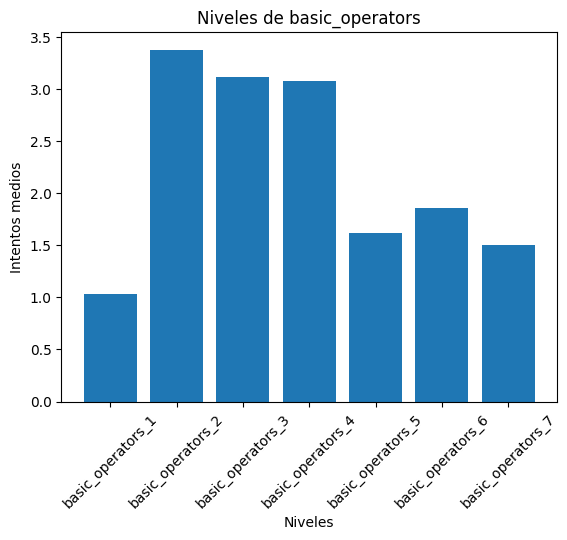

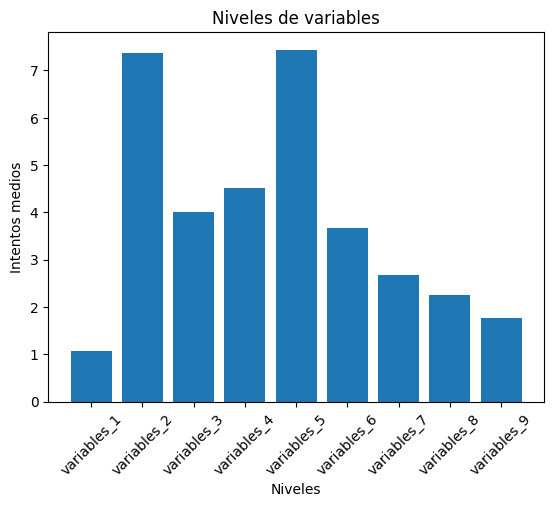

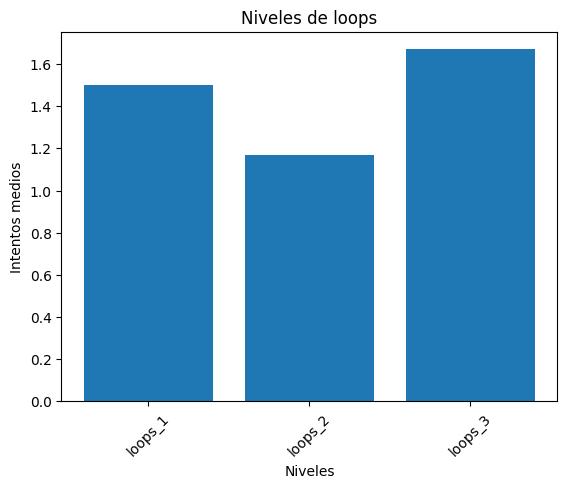

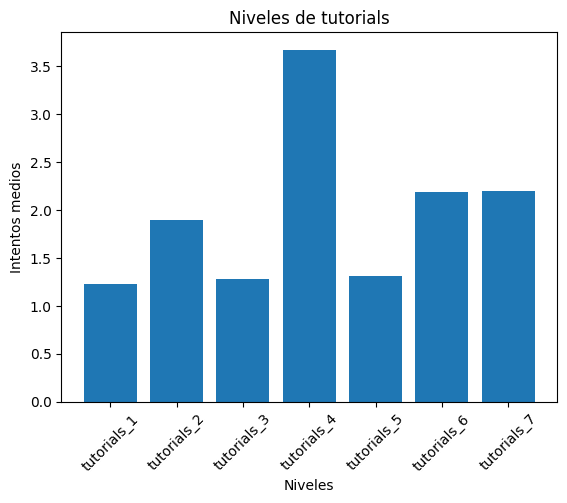

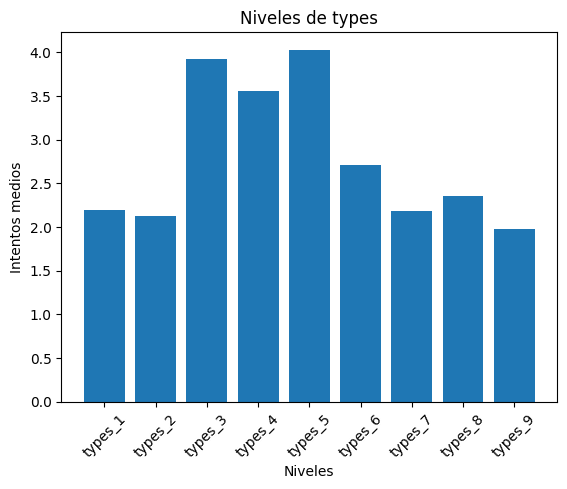

In [24]:
import re
import matplotlib.pyplot as plt

levels = [('basic_operators_1', 1.03), ('variables_1', 1.07), ('loops_2', 1.17), ('tutorials_1', 1.23), ('tutorials_3', 1.28), ('tutorials_5', 1.31), ('basic_operators_7', 1.5), ('loops_1', 1.5), ('basic_operators_5', 1.62), ('loops_3', 1.67), ('variables_9', 1.77), ('basic_operators_6', 1.86), ('tutorials_2', 1.9), ('types_9', 1.97), ('types_2', 2.13), ('types_7', 2.18), ('tutorials_6', 2.19), ('types_1', 2.19), ('tutorials_7', 2.2), ('variables_8', 2.25), ('types_8', 2.35), ('variables_7', 2.68), ('types_6', 2.71), ('basic_operators_4', 3.08), ('basic_operators_3', 3.12), ('basic_operators_2', 3.38), ('types_4', 3.55), ('variables_6', 3.66), ('tutorials_4', 3.67), ('types_3', 3.92), ('variables_3', 4.01), ('types_5', 4.03), ('variables_4', 4.52), ('variables_2', 7.36), ('variables_5', 7.44)]

levels_by_category = {}

for level in levels:
    level_name, level_value = level
    match = re.search(r'(.*)_(\d+)', level_name)
    if match:
        level_category, level_num = match.group(1), int(match.group(2))
        if level_category not in levels_by_category:
            levels_by_category[level_category] = []
        levels_by_category[level_category].append((level_num, level_value))


for category, category_levels in levels_by_category.items():
    category_levels.sort()
    values = [v for n, v in category_levels]
    levels_names = [f"{category}_{n}" for n, v in category_levels]
    fig, ax = plt.subplots()
    ax.bar(levels_names, values)
    ax.set_title(f"Niveles de {category}")
    ax.set_xlabel("Niveles")
    ax.set_ylabel("Intentos medios")
    plt.xticks(rotation=45)


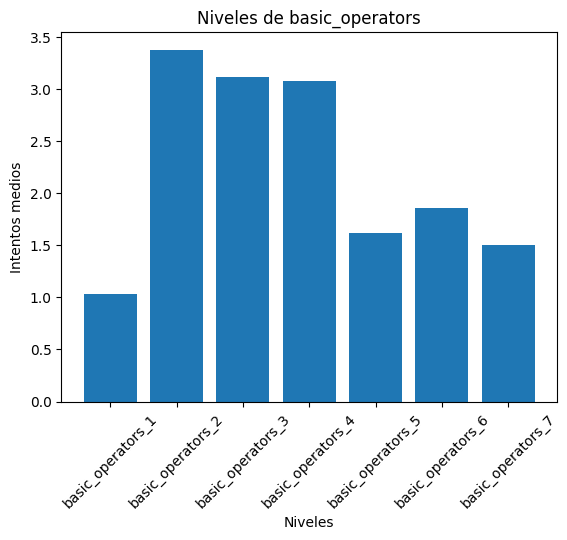

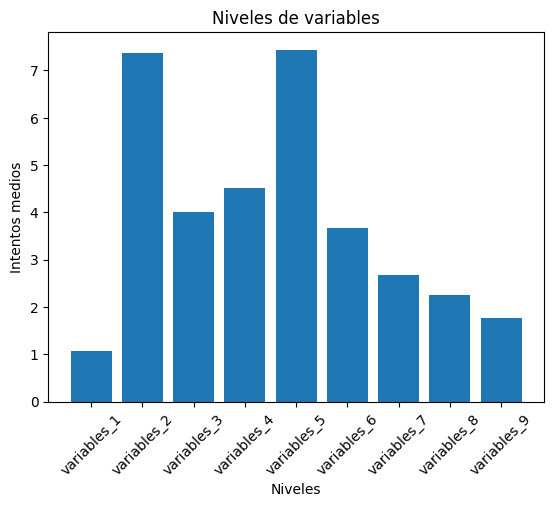

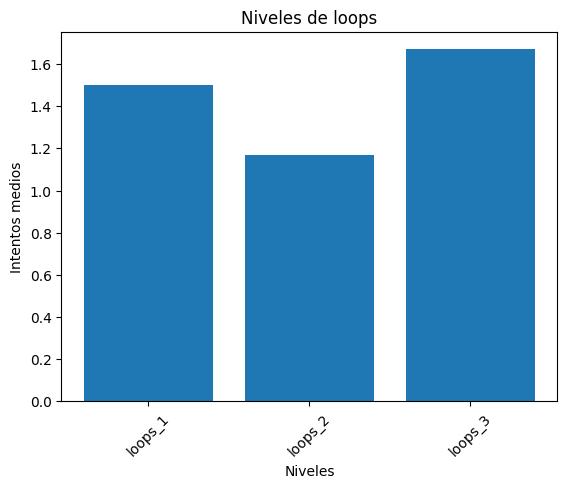

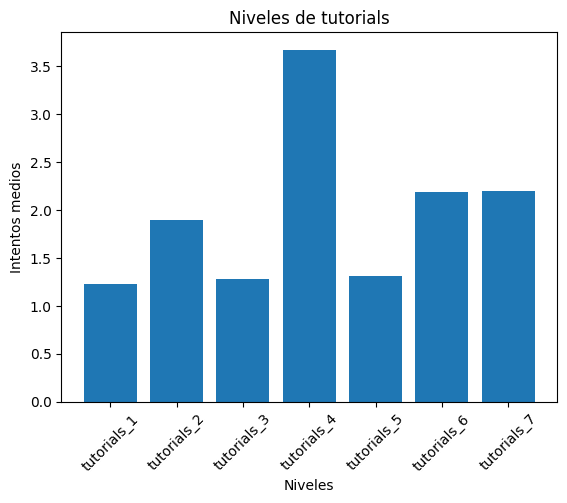

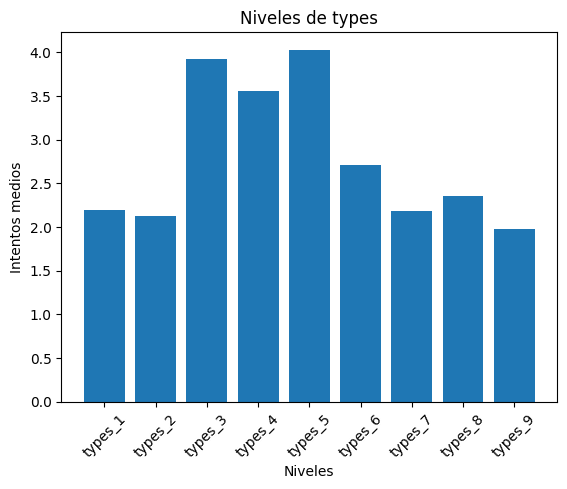

In [25]:
import re
import matplotlib.pyplot as plt

def plot_levels(levels):
    levels_by_category = {}

    for level in levels:
        level_name, level_value = level
        match = re.search(r'(.*)_(\d+)', level_name)
        if match:
            level_category, level_num = match.group(1), int(match.group(2))
            if level_category not in levels_by_category:
                levels_by_category[level_category] = []
            levels_by_category[level_category].append((level_num, level_value))

    for category, category_levels in levels_by_category.items():
        category_levels.sort()
        values = [v for n, v in category_levels]
        levels_names = [f"{category}_{n}" for n, v in category_levels]
        fig, ax = plt.subplots()
        ax.bar(levels_names, values)
        ax.set_title(f"Niveles de {category}")
        ax.set_xlabel("Niveles")
        ax.set_ylabel("Intentos medios")
        plt.xticks(rotation=45)

plot_levels(levels)

In [39]:
from utilities import Tiempo
tiempos = [('tutorials_5', Tiempo("34s")), ('tutorials_3', "37s"), ('basic_operators_1', "47s"), ('tutorials_2', "55s"), ('tutorials_1', "1m"), ('variables_1', "1m/2s"), ('loops_2', "1m/20s"), ('types_1', "1m/39s"), ('types_2', "1m/43s"), ('loops_3', "1m/46s"), ('basic_operators_6', "2m/5s"), ('basic_operators_7', "2m/5s"), ('tutorials_6', "2m/17s"), ('tutorials_7', "2m/19s"), ('loops_1', "2m/40s"), ('basic_operators_5', "2m/52s"), ('variables_9', "3m"), ('tutorials_4', "3m/2s"), ('variables_8', "3m/6s"), ('variables_3', "3m/14s"), ('types_9', "3m/27s"), ('types_6', "3m/42s"), ('types_8', "3m/51s"), ('variables_7', "4m/6s"), ('variables_4', "4m/19s"), ('types_7', "4m/24s"), ('variables_6', "4m/55s"), ('variables_2', "5m/18s"), ('types_3', "5m/18s"), ('basic_operators_3', "5m/33s"), ('types_4', "6m/4s"), ('types_5', "6m/43s"), ('basic_operators_2', "7m/14s"), ('variables_5', "7m/36s"), ('basic_operators_4', "8m/49s")]

In [40]:
int(Tiempo("1m/56s"))


TypeError: int() argument must be a string, a bytes-like object or a real number, not 'Tiempo'